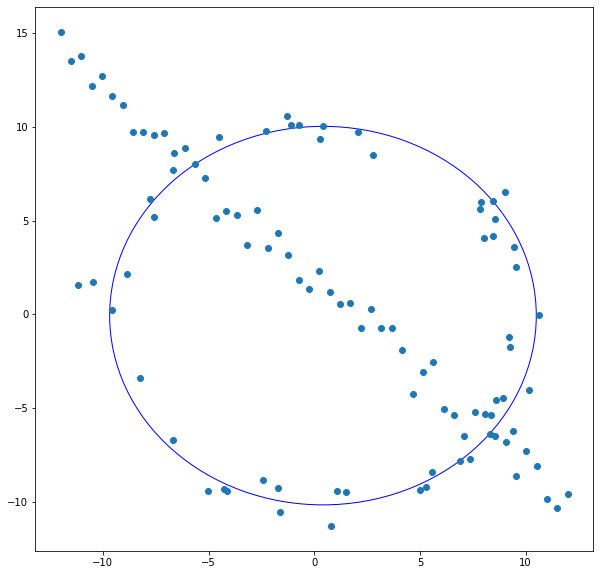

In [67]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt

def findCircle(p1, p2, p3):
    temp1 = p2[0]**2 + p2[1]**2
    temp2 = (p1[0]**2 + p1[1]**2 - temp1)/2
    temp3 = (temp1 - p3[0]**2 - p3[1]**2)/2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-10:
        return None
    centre_x = (temp2*(p2[1] - p3[1]) - temp3*(p1[1] - p2[1]))/ det
    centre_y = ((p1[0] - p2[0]) * temp3 - (p2[0] - p3[0])*temp2)/ det

    r = ((centre_x - p1[0])**2 + (centre_y - p1[1])**2)**0.5

    return list((centre_x, centre_y, r))

def shortestDistance(p,center_x,center_y,radius):
    d= np.array(abs(((p[0]-center_x)**2+(p[1]-center_y)**2)**0.5-radius))
    return d

def RANSAC(data,iterations,thresh):
    #Inliers=[]
    maxInliers=0
    #global maxInlierList
    #maxInlierList=[]
    for j in range(iterations):
        random=np.random.choice(len(data),size=3,replace=False)
        
        
        circle=findCircle(data[random[0]],data[random[1]],data[random[2]])
        if circle==None:continue
        cx,cy,r=circle[0],circle[1],circle[2]
        
        
        noInliers=0
    
        for i in data:
            if thresh>shortestDistance(i,cx,cy,r):noInliers+=1
            #Inliers.append(i)
        if noInliers>maxInliers:
            maxInliers=noInliers
            #maxInlierList=Inliers
            Cx,Cy,R=cx,cy,r
        #Inliers=[]

    return Cx,Cy,R



def plotCircle(Data,Datalst,color='r'):
    centerx,centery,radius=findCircle(Datalst[Data[0]],Datalst[Data[1]],Datalst[Data[2]])
    c=plt.Circle((centerx,centery),radius,fill=False)
    c.set_color(color)
    return c


N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x +b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))
Cx,Cy,R=RANSAC(X,500,1)
#BestCx,BestCy,BestR=RANSAC(maxInlierList,500,0.75)
fig,ax=plt.subplots(figsize=(10,10))
cir=plt.Circle((Cx,Cy),R,color='b',fill=False)
#best=plt.Circle((BestCx,BestCy),BestR,color='r',fill=False)
ax.add_patch(cir)
#ax.add_patch(best)
plt.scatter(X[:,0],X[:,1])



